In [9]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling te

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import numpy as np
import math, re, os


IMAGE_SIZE = [224, 224]
GCS_PATH = "/content/drive/MyDrive/tfrecords-jpeg-224x224"
AUTO = tf.data.experimental.AUTOTUNE

TRAINING_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/val/*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/test/*.tfrec')
CLASSES = [
  'pink primrose',        'hard-leaved pocket orchid', 'canterbury bells',         # 00-02
  'sweet pea',            'wild geranium',             'tiger lily',               # 03-05
  'moon orchid',          'bird of paradise',          'monkshood',                # 06-08
  'globe thistle',        'snapdragon',                "colt's foot",              # 09-11
  'king protea',          'spear thistle',             'yellow iris',              # 12-14
  'globe-flower',         'purple coneflower',         'peruvian lily',            # 15-17
  'balloon flower',       'giant white arum lily',     'fire lily',                # 18-20
  'pincushion flower',    'fritillary',                'red ginger',               # 21-23
  'grape hyacinth',       'corn poppy',                'prince of wales feathers', # 24-26
  'stemless gentian',     'artichoke',                 'sweet william',            # 27-29
  'carnation',            'garden phlox',              'love in the mist',         # 30-32
  'cosmos',               'alpine sea holly',          'ruby-lipped cattleya',     # 33-35
  'cape flower',          'great masterwort',          'siam tulip',               # 36-38
  'lenten rose',          'barberton daisy',           'daffodil',                 # 39-41
  'sword lily',           'poinsettia',                'bolero deep blue',         # 42-44
  'wallflower',           'marigold',                  'buttercup',                # 45-47
  'daisy',                'common dandelion',          'petunia',                  # 48-50
  'wild pansy',           'primula',                   'sunflower',                # 51-53
  'lilac hibiscus',       'bishop of llandaff',        'gaura',                    # 54-56
  'geranium',             'orange dahlia',             'pink-yellow dahlia',       # 57-59
  'cautleya spicata',     'japanese anemone',          'black-eyed susan',         # 60-62
  'silverbush',           'californian poppy',         'osteospermum',             # 63-65
  'spring crocus',        'iris',                      'windflower',               # 66-68
  'tree poppy',           'gazania',                   'azalea',                   # 69-71
  'water lily',           'rose',                      'thorn apple',              # 72-74
  'morning glory',        'passion flower',            'lotus',                    # 75-77
  'toad lily',            'anthurium',                 'frangipani',               # 78-80
  'clematis',             'hibiscus',                  'columbine',                # 81-83
  'desert-rose',          'tree mallow',               'magnolia',                 # 84-86
  'cyclamen ',            'watercress',                'canna lily',               # 87-89
  'hippeastrum ',         'bee balm',                  'pink quill',               # 90-92
  'foxglove',             'bougainvillea',             'camellia',                 # 93-95
  'mallow',               'mexican petunia',           'bromelia',                 # 96-98
  'blanket flower',       'trumpet creeper',           'blackberry lily',          # 99-101
  'common tulip',         'wild rose'                                              #102-103
]


In [2]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image


In [3]:
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "class": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label



In [4]:
def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "id": tf.io.FixedLenFeature([], tf.string),  }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum


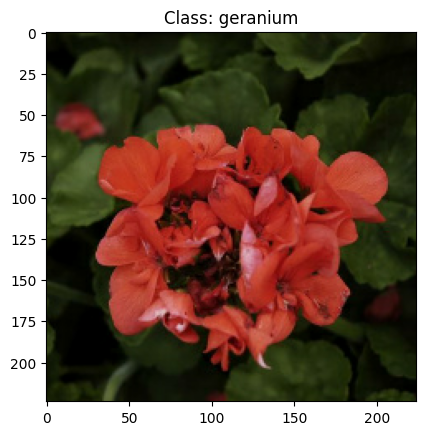

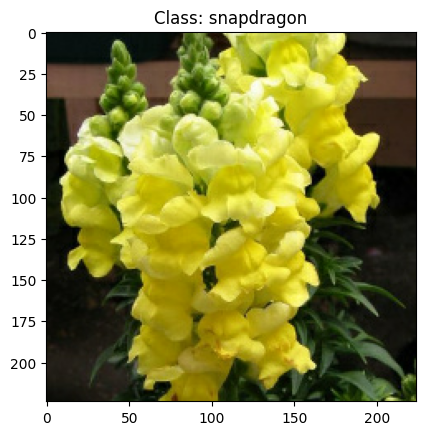

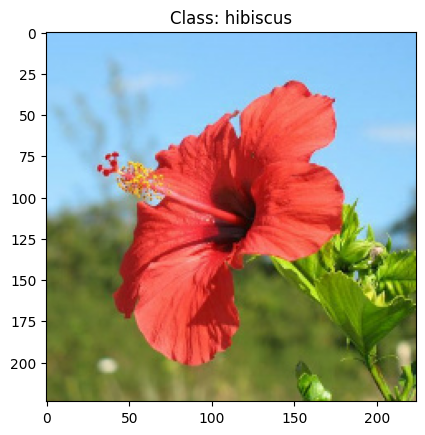

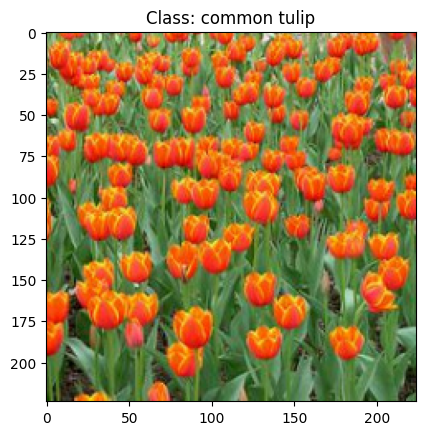

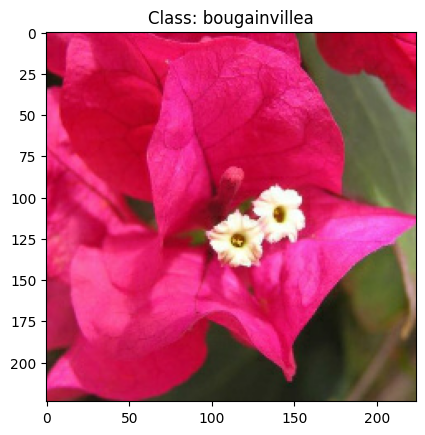

In [5]:
sample_dataset = tf.data.TFRecordDataset(TRAINING_FILENAMES).take(5)
train_dataset = sample_dataset.map(read_labeled_tfrecord)
for image, label in train_dataset:
    plt.figure()
    plt.imshow(image.numpy())
    plt.title(f"Class: {CLASSES[label.numpy()]}")
    plt.show()

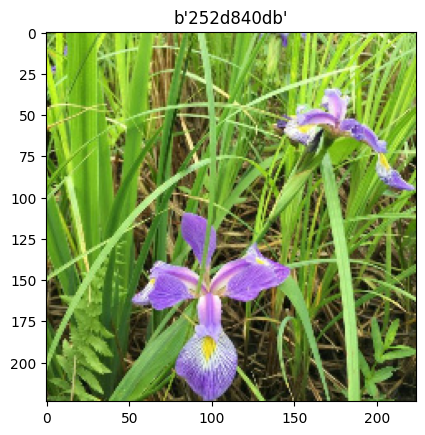

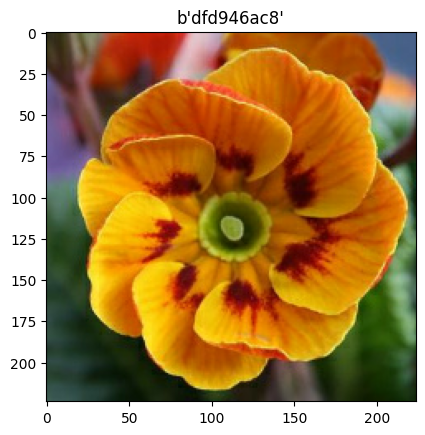

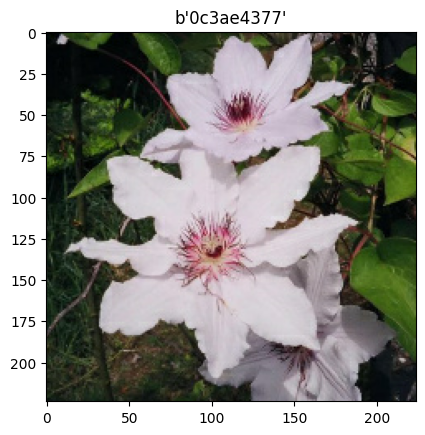

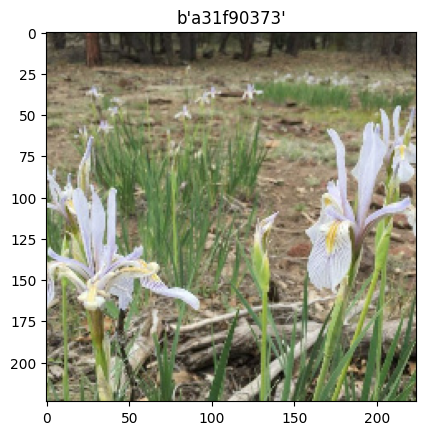

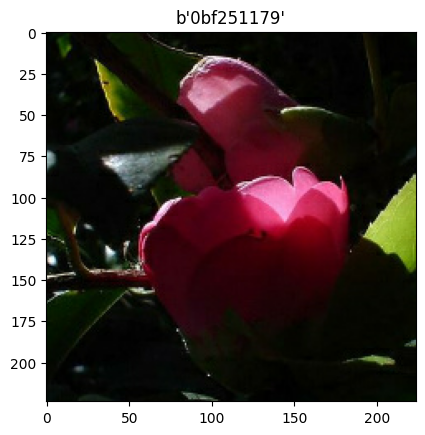

In [6]:
sample_dataset = tf.data.TFRecordDataset(TEST_FILENAMES).take(5)
test_dataset = sample_dataset.map(read_unlabeled_tfrecord)

for image, idnum in test_dataset:
    plt.figure()
    plt.imshow(image.numpy())
    plt.title(idnum.numpy())
    plt.show()


In [7]:
def load_dataset(filenames, labeled=True, ordered=False):


    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    return dataset


In [8]:
def data_augment(image, label):

    image = tf.image.random_flip_left_right(image)
    image_shape = image.shape

    print("Image shape:", image_shape)
    return image, label


def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset



def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):

    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))

Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


In [9]:
# from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 16

ds_train = get_training_dataset()
# ds_train_encoded = to_categorical(ds_train, num_classes=104)

ds_valid = get_validation_dataset()
# ds_valid_encoded = to_categorical(ds_valid, num_classes=104)

ds_test = get_test_dataset()
# ds_test_encoded = to_categorical(ds_test, num_classes=104)


print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)

Image shape: (224, 224, 3)
Training: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Test: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [10]:
np.set_printoptions(threshold=15, linewidth=80)

print("Training data shapes:")
for image, label in ds_train.take(3):
    print(image.numpy().shape, label.numpy().shape)
print("Training data label examples:", label.numpy())

Training data shapes:
(16, 224, 224, 3) (16,)
(16, 224, 224, 3) (16,)
(16, 224, 224, 3) (16,)
Training data label examples: [87 49 71 ... 67 95 94]


In [11]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Test data IDs:", idnum.numpy().astype('U')) # U=unicode string

Test data shapes:
(16, 224, 224, 3) (16,)
(16, 224, 224, 3) (16,)
(16, 224, 224, 3) (16,)
Test data IDs: ['5d23a793d' '49e871eee' '7371defc6' ... 'f4672d1aa' '64a27fd4c' '31323febb']


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
LEARNING_RATE = 0.006

# Create an optimizer with the specified fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(104, activation='softmax')
])

# Compile the model
model.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy'])

# Print the model summary
model.summary()


EPOCHS = 15
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

Epoch 1/15
797/797 [==============================] - 49s 45ms/step - loss: 4.2876 - accuracy: 0.0572 - val_loss: 4.1698 - val_accuracy: 0.0582
Epoch 2/15
797/797 [==============================] - 29s 36ms/step - loss: 4.1765 - accuracy: 0.0601 - val_loss: 4.1636 - val_accuracy: 0.0614
Epoch 3/15
797/797 [==============================] - 25s 31ms/step - loss: 4.1714 - accuracy: 0.0598 - val_loss: 4.1685 - val_accuracy: 0.0582
Epoch 4/15
797/797 [==============================] - 26s 33ms/step - loss: 4.1706 - accuracy: 0.0581 - val_loss: 4.1631 - val_accuracy: 0.0552
Epoch 5/15
797/797 [==============================] - 25s 31ms/step - loss: 4.1735 - accuracy: 0.0610 - val_loss: 4.1622 - val_accuracy: 0.0614
Epoch 6/15
797/797 [==============================] - 26s 33ms/step - loss: 4.1711 - accuracy: 0.0600 - val_loss: 4.1644 - val_accuracy: 0.0582
Epoch 7/15
797/797 [==============================] - 25s 31ms/step - loss: 4.1709 - accuracy: 0.0573 - val_loss: 4.1610 - val_accuracy:

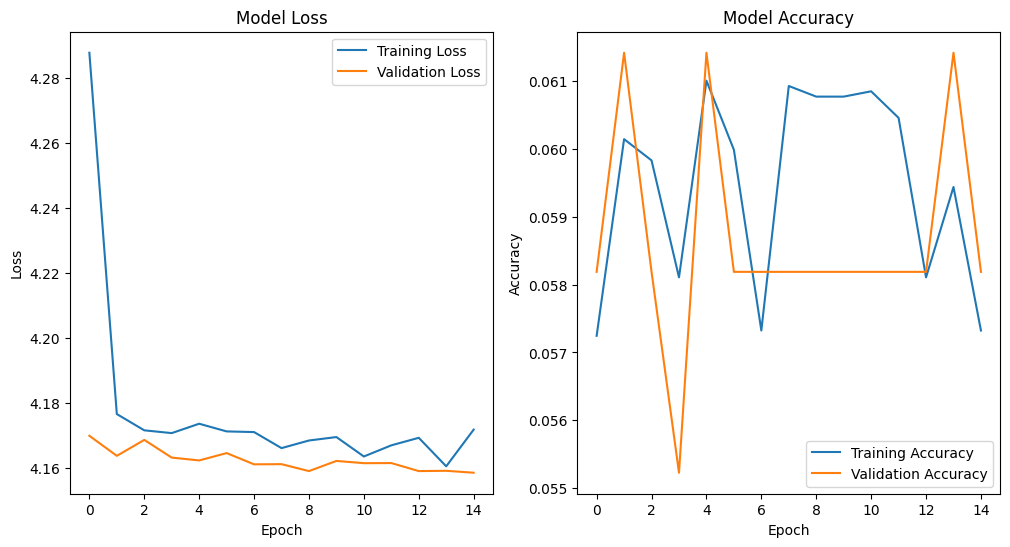

In [13]:
import matplotlib.pyplot as plt

# Train the model and get the history object
history = model.fit(ds_train, validation_data=ds_valid, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()




# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
